# Videos

Frame ~690 in výška závaží = frame 0 in páka
The end of movement in výška závaží is around frame 1720 (roughly accurate with the frame length of 1097 for páka)

## Páka

1cm ~ 80px
Starts at 9,1cm
Straight point ~ 2,5cm - 3cm ?
Lowest point ~ 0,1cm

## Výška závaží

1cm ~ 56px
highest point ~ 5,3cm

# Values

The bag's dimensions are 23 x 13 x 2,5 cm^3 (approximated as a rectangular prism)
- When pushed down along its length with the plank

The plank's dimension are 70 x 10 x 1,7 cm^3
- The width of the plank is a bit less than half the length of the bag, ideal, so that it minimally affects the second object
- The calculated area of the plank as a piston is: 9,8 x 13 cm^2 = 0,1274

Measuring the area of the ball as a piston:
- S = $\frac{dV}{dy}$
- We can also calculate S by calculating the difference in x and y (height of the objects), where one of the objects is the wooden plank, whose piston area is known and by expecting a constant volume (the air inside wasn't compressed at all)


$dV = dx * S1 + dy*S2$\
$S2 = \frac{dV - dx}{dy}S1$\
A protože počítáme s $dV = 0$\
$S2 = \frac{-dx}{dy}S1$


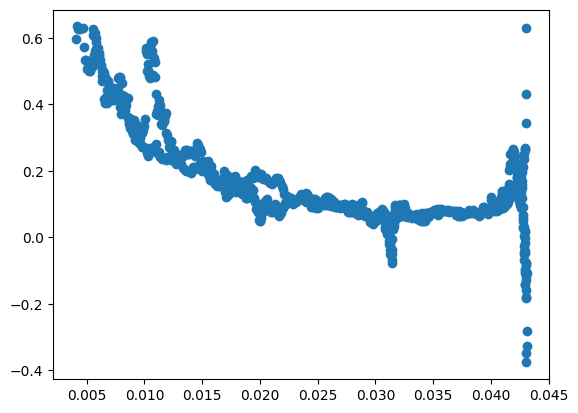

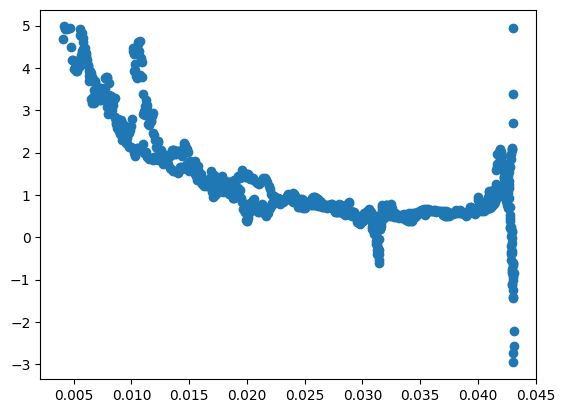

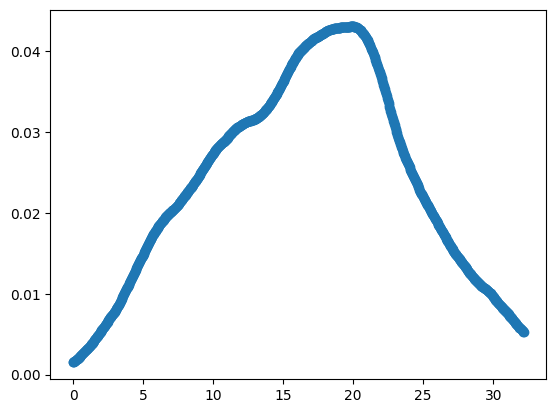

In [4]:
import numpy as np
import matplotlib.pyplot as plt

lmap = lambda f,x : list(map(f, x))

tdata = []
xdata = []
ydata = []

with open("páka.csv", "r+") as read:
    data = read.readlines()[1:]
    data = lmap(lambda row: row.rstrip().split(","), data)

    tdata = lmap(lambda row: float(row[0]), data)
    xdata = lmap(lambda row: float(row[2])/8000, data)
    minX = min(xdata)
    xdata = lmap(lambda x: x-minX, xdata)

with open("výška závaží.csv", "r+") as read:
    data = read.readlines()[1:]
    data = lmap(lambda row: row.rstrip().split(","), data)

    temp = lmap(lambda row: float(row[0]), data)
    if (len(temp) < len(tdata)): tdata = temp
    ydata = lmap(lambda row: float(row[2])/5600, data)
    minY = min(ydata)
    ydata = lmap(lambda y: y-minY, ydata)
    
        
xdata = xdata[:len(tdata)]
ydata = ydata[:len(tdata)]

smoothAmount = 75
v = np.ones(smoothAmount)/smoothAmount
flAvgXdata = np.convolve(xdata, v, "valid")
flAvgYdata = np.convolve(ydata, v, "valid")

tdata = tdata[:len(flAvgYdata)]


dx = 0
dy = 0
S1 = 0.1274 # m^2

S2Times = []
S2Values = []
S2yValues = []
other = []

for i in range(1, len(tdata)):
    dx = flAvgXdata[i] - flAvgXdata[i-1]
    dy = flAvgYdata[i] - flAvgYdata[i-1]
    if (dy == 0): continue
    S2 = -dx/dy*S1
    # S2Values.append(S2)
    # S2Times.append(tdata[i])
    # S2yValues.append(flAvgYdata[i])
    # other.append(dx/dy)
    if (abs(S2) < 5*S1):
        S2Values.append(S2)
        S2Times.append(tdata[i])
        S2yValues.append(flAvgYdata[i])
        other.append(-dx/dy)

plt.scatter(S2yValues, S2Values)
plt.show()

plt.scatter(S2yValues, other)
plt.show()

plt.scatter(tdata, flAvgYdata)
plt.show()

# A different assumption

The data from assumption, that $dV = 0$ are a bit strange value-wise. It may have been innacurate to say that the volume of the air in the bag is essentially constant.
This time around, we will divide the bag into 2 systems. One of which will have $dV_1 =\ change\ of\ the\ planks\ position$ and $dV_2 = -dV_1$\
In other words, we will calculate the dV of one half of the bag.

## Values

The point of measuring the height of the plank is about 60cm from its other end.
We will assume the planks pivot point is 1cm from its end (we didn't measure it precisely...) and the pivot point itself is another half length of the diameter of the marker. 

- The pivot point of the plank was around 1cm, on a marker with a diameter of 1,8cm (probably worth a re-measure)
- The area where we measured the height of the plank was about 60cm from its end
- The distance from the measurement to the pivot point is $60-1-0,9 cm = 58,1 cm$.
- The force of the plank on the bag was at 30cm from the end of the plank, so about 28,1cm from the pivot
  - (so the section from $\langle 21,6; 34,4 \rangle $)

With advice from Ondřej Sedláček, we will approximate the volume as the difference of two cylinders. (viz [obr.png](./obr.png)).

$V_1 = \frac{\alpha}{360} \cdot \Delta r \cdot \pi \cdot width$\
$dV_2 = -dV_1$\
$S_2 = \frac{dV_2}{dy}$\
$S_2 = \frac{-dV_1}{dy}$



-302674.46009723126x^5 + 34648.18419614832x^4 -1485.0267784666885x^3 + 30.144859103946143x^2 + -0.3090481585038473x + 0.0015738826330228954


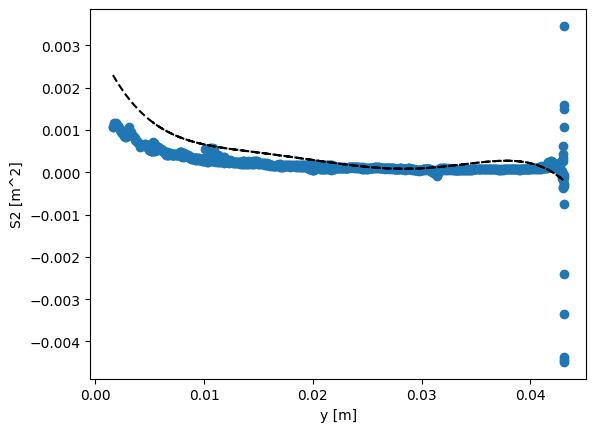

In [5]:
import numpy as np
import matplotlib.pyplot as plt

lmap = lambda f,x : list(map(f, x))

tdata = []
xdata = []
ydata = []

with open("páka.csv", "r+") as read:
    data = read.readlines()[1:]
    data = lmap(lambda row: row.rstrip().split(","), data)

    tdata = lmap(lambda row: float(row[0]), data)
    xdata = lmap(lambda row: float(row[2])/8000, data)
    minX = min(xdata)
    xdata = lmap(lambda x: x-minX, xdata)

with open("výška závaží.csv", "r+") as read:
    data = read.readlines()[1:]
    data = lmap(lambda row: row.rstrip().split(","), data)

    temp = lmap(lambda row: float(row[0]), data)
    if (len(temp) < len(tdata)): tdata = temp
    ydata = lmap(lambda row: float(row[2])/5600, data)
    minY = min(ydata)
    ydata = lmap(lambda y: y-minY, ydata)
    
        
xdata = xdata[:len(tdata)]
ydata = ydata[:len(tdata)]

smoothAmount = 75
v = np.ones(smoothAmount)/smoothAmount
flAvgXdata = np.convolve(xdata, v, "valid")
flAvgYdata = np.convolve(ydata, v, "valid")

tdata = tdata[:len(flAvgYdata)]

# Constants
l = 0.581 # length from measure point to pivot point
h0 = 0.091
S1 = 0.1274 # m^2
r1 = 0.216
r2 = 0.344
r = r2-r1
V = 0.0075
alpha = np.arcsin(h0/l) # alpha at the start

def vol(alph):
    return (alph*np.pi*r*0.065)/360

# Variables
dV = 0 # change of volume
oldV = vol(alpha)
dx = 0
dy = 0

S2Times = []
S2Values = []
S2yValues = []

for i in range(1, len(tdata)):
    dx = flAvgXdata[i] - flAvgXdata[i-1]
    dy = flAvgYdata[i] - flAvgYdata[i-1]
    alpha = np.arcsin(flAvgXdata[i]/l)
    dV = vol(alpha)-oldV
    oldV = vol(alpha)
    if (dy == 0): continue
    S2 = -dV/dy
    if (abs(S2) < 0.005):
        S2Values.append(S2)
        S2Times.append(tdata[i])
        S2yValues.append(flAvgYdata[i])

e, f, a, b, c, d = np.polyfit(S2yValues, S2Values, 5)
m = min(S2yValues)
n = max(S2yValues)

plt.scatter(S2yValues, S2Values)
print(f"{e}x^5 + {f}x^4 {a}x^3 + {b}x^2 + {c}x + {d}")
def fun(x):
    global a, b, c, d
    return e*x**5 + f*x**4 + a*x**3 + b*x**2 + c*x + d
plt.plot(S2yValues, [2*fun(x) for x in S2yValues], "k--")
plt.xlabel("y [m]")
plt.xlabel("y [m]")
plt.ylabel("S2 [m^2]")
plt.show()

-302674.46009723126x^5 + 34648.18419614832x^4 -1485.0267784666885x^3 + 30.144859103946143x^2 + -0.3090481585038473x + 0.0015738826330228954


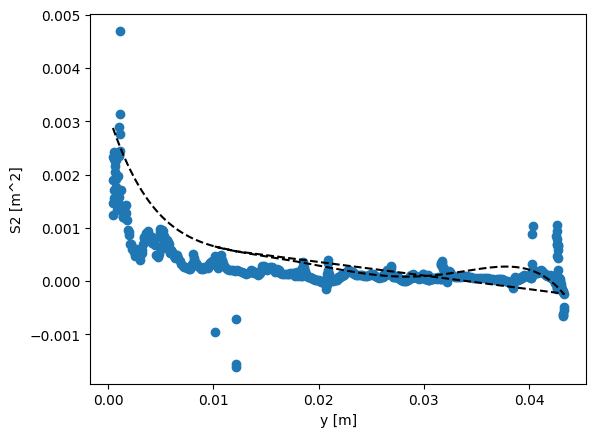

In [6]:
from scipy.optimize import curve_fit

smoothAmount = 20
v = np.ones(smoothAmount)/smoothAmount
flAvgXdata = np.convolve(xdata, v, "valid")
flAvgYdata = np.convolve(ydata, v, "valid")

tdata = tdata[:len(flAvgYdata)]

# Constants
l = 0.581 # length from measure point to pivot point
h0 = 0.091
S1 = 0.1274 # m^2
r1 = 0.216
r2 = 0.344
r = r2-r1
V = 0.0075
alpha = np.arcsin(h0/l) # alpha at the start

def vol(alph):
    return (alph*np.pi*r*0.065)/360

# Variables
dV = 0 # change of volume
oldV = vol(alpha)
dx = 0
dy = 0

S2Times = []
S2Values = []
S2yValues = []

for i in range(1, len(tdata)):
    dx = flAvgXdata[i] - flAvgXdata[i-1]
    dy = flAvgYdata[i] - flAvgYdata[i-1]
    alpha = np.arcsin(flAvgXdata[i]/l)
    dV = vol(alpha)-oldV
    oldV = vol(alpha)
    if (dy < 0.00001): continue
    S2 = -dV/dy
    if (abs(S2) < 0.005):
        S2Values.append(S2)
        S2Times.append(tdata[i])
        S2yValues.append(flAvgYdata[i])

# a, b, c, d = np.polyfit(S2yValues, S2Values, 3)
# m = min(S2yValues)
# n = max(S2yValues)

plt.scatter(S2yValues, S2Values)
print(f"{e}x^5 + {f}x^4 {a}x^3 + {b}x^2 + {c}x + {d}")
# def fun(x):
#     global a, b, c, d
#     return a*x**3 + b*x**2 + c*x + d
plt.plot(S2yValues, [2*fun(x) for x in S2yValues], "k--")
plt.xlabel("y [m]")
plt.ylabel("S2 [m^2]")
plt.show()